In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Bootstrap review: San Francisco City Salaries

In [2]:
sf_pop = Table.read_table('san_francisco_2015.csv').where('Total Compensation', are.above(10000))
sf_pop = sf_pop.where('Total Compensation', are.above(10*40*52))
pop_median = percentile(50, sf_pop.column('Total Compensation'))
print("Population median is $", pop_median)

our_sample = sf_pop.sample(300, with_replacement = False)

Population median is $ 112965.15


In [6]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('Total Compensation'))

med_bins = np.arange(90000, 125001, 2500)

In [4]:
one_bootstrap_median()

111530.93

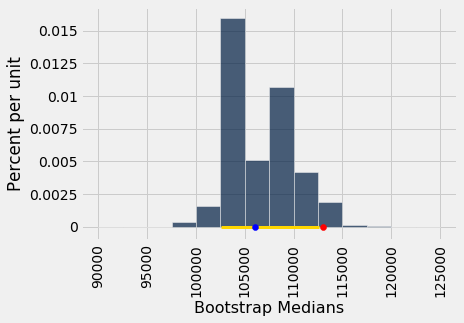

In [10]:
## Let's do the whole process, all at once: 
## 1. take a sample, 

our_sample = sf_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))


## 2. use it to make many bootstrap samples,

bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)


## 3. and use the middle 95% of the bootstrap medians as our confidence interval

left = percentile(5, bootstrap_medians)
right = percentile(95, bootstrap_medians)

Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=med_bins)
plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);

In [11]:
print(left,right)

102558.85 112622.89


## Bootstrap Review: Mean Maternal Age

In [15]:
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


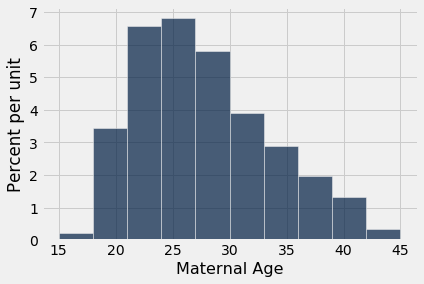

In [16]:
births.hist('Maternal Age')

In [17]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [18]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [22]:
one_bootstrap_mean()

27.049403747870528

In [23]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(10, bootstrap_means)
right = percentile(90, bootstrap_means)
print(left,right)

26.99488926746167 27.455706984667803


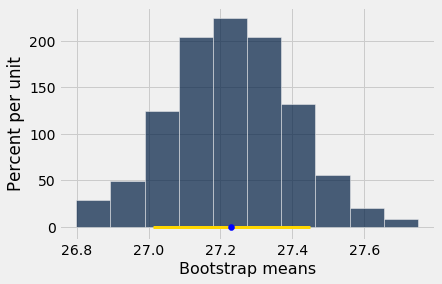

In [40]:
Table().with_column('Bootstrap means', bootstrap_means).hist()
plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);

## Average (Mean) ##

In [ ]:
values = make_array(2, 3, 3, 9)

In [ ]:
sum(values)/len(values)

In [ ]:
np.average(values)

In [ ]:
np.mean(values)

In [ ]:
(2 + 3 + 3 + 9)/4

In [ ]:
2*(1/4) + 3*(2/4) + 9*(1/4)

In [ ]:
values_table = Table().with_columns('value', values)
values_table

In [ ]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [ ]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

In [ ]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [ ]:
np.average(values)

In [ ]:
np.average(new_vals)

### Discussion Question

In [ ]:
nba = Table.read_table('nba2013.csv')
nba

In [ ]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [ ]:
heights = nba.column('Height')
percentile(50, heights)

In [ ]:
np.average(heights)

## Standard Deviation ##

In [ ]:
sd_table = Table().with_columns('Value', values)
sd_table

In [ ]:
average_value = np.average(sd_table.column(0))
average_value

In [ ]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

In [ ]:
sum(deviations)

In [ ]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

In [ ]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

In [ ]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

In [ ]:
np.std(values)

In [3]:
class Baller:
    all_players=[]
    def __init__(self,name,has_ball=False):
        self.name=name
        self.has_ball=has_ball
        Baller.all_players.append(self)
    def pass_ball(self,other_player):
        if self.has_ball:
            self.has_ball= False
            other_player.has_ball= True
            return True
        else:
            return False
class Ballhog(Baller):
    def pass_ball(self,other_player):
        return False
neil= Baller("Niel", True)
neil()

TypeError: 'Baller' object is not callable

In [5]:
Michelle= Ballhog("Michelle")
Michelle

In [9]:
len(Baller.all_players)

3

In [10]:
Baller.name

AttributeError: type object 'Baller' has no attribute 'name'

In [12]:
len(Michelle.all_players)

3

In [33]:
neil.pass_ball(neil)

False

In [34]:
neil.pass_ball(Michelle)

False

In [35]:
neil.pass_ball(Michelle)

False

In [36]:
neil.pass_ball(Michelle)

False

In [37]:
Michelle.pass_ball(neil)

False

In [38]:
Ballhog.pass_ball(Michelle,neil)

False

In [19]:
Michelle.pass_ball(neil)

False

In [20]:
Michelle.pass_ball(Michelle,neil)

TypeError: pass_ball() takes 2 positional arguments but 3 were given